<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.435119,31.085693,43.451791,62.804115,-0.000611,223.776108,223.776604,-0.000496
1,0.0,1.0,40.126397,43.897863,84.474352,98.315147,-0.000353,276.813406,276.813486,-0.000080
2,0.0,2.0,83.424767,92.967787,86.097025,49.388520,0.000096,321.878195,321.878359,-0.000164
3,0.0,3.0,61.944919,28.418312,44.764483,74.554969,-0.000677,219.682006,219.682365,-0.000359
4,0.0,4.0,69.511188,56.676174,40.598734,57.034899,0.000308,233.821303,233.820657,0.000646
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.820467,36.866627,47.262626,88.717472,0.000051,266.667243,266.667418,-0.000175
19996,999.0,16.0,99.786776,31.836872,84.344138,31.454842,-0.000175,257.422453,257.422069,0.000384
19997,999.0,17.0,89.216583,57.165844,74.454920,70.157113,-0.000259,300.994201,300.994159,0.000041
19998,999.0,18.0,94.441740,58.041299,86.858624,84.620302,0.000025,333.961989,333.961571,0.000418


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.435119,31.085693,43.451791,62.804115,-0.000611,223.776108,223.776604,-0.000496
1,0.0,1.0,40.126397,43.897863,84.474352,98.315147,-0.000353,276.813406,276.813486,-0.000080
2,0.0,2.0,83.424767,92.967787,86.097025,49.388520,0.000096,321.878195,321.878359,-0.000164
3,0.0,3.0,61.944919,28.418312,44.764483,74.554969,-0.000677,219.682006,219.682365,-0.000359
4,0.0,4.0,69.511188,56.676174,40.598734,57.034899,0.000308,233.821303,233.820657,0.000646
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.820467,36.866627,47.262626,88.717472,0.000051,266.667243,266.667418,-0.000175
19996,999.0,16.0,99.786776,31.836872,84.344138,31.454842,-0.000175,257.422453,257.422069,0.000384
19997,999.0,17.0,89.216583,57.165844,74.454920,70.157113,-0.000259,300.994201,300.994159,0.000041
19998,999.0,18.0,94.441740,58.041299,86.858624,84.620302,0.000025,333.961989,333.961571,0.000418


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.435119  31.085693  43.451791  62.804115 -0.000611  223.776108   
      1.0    40.126397  43.897863  84.474352  98.315147 -0.000353  276.813406   
      2.0    83.424767  92.967787  86.097025  49.388520  0.000096  321.878195   
      3.0    61.944919  28.418312  44.764483  74.554969 -0.000677  219.682006   
      4.0    69.511188  56.676174  40.598734  57.034899  0.000308  233.821303   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.820467  36.866627  47.262626  88.717472  0.000051  266.667243   
      16.0   99.786776  31.836872  84.344138  31.454842 -0.000175  257.422453   
      17.0   89.216583  57.165844  74.454920  70.157113 -0.000259  300.994201   
      18.0   94.441740  58.041299  86.858624  84.620302  0.000025  333.961989   
      19.0   38.106990  21.983013  36.453146  91.075991  0.000982  197.620122   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.776604 -0.000496  
      1.0    276.813486 -0.000080  
      2.0    321.878359 -0.000164  
      3.0    219.682365 -0.000359  
      4.0    233.820657  0.000646  
...                 ...       ...  
999.0 15.0   266.667418 -0.000175  
      16.0   257.422069  0.000384  
      17.0   300.994159  0.000041  
      18.0   333.961571  0.000418  
      19.0   197.619822  0.000299  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.435119  31.085693  43.451791  62.804115 -0.000611  223.776108   
      1.0    40.126397  43.897863  84.474352  98.315147 -0.000353  276.813406   
      2.0    83.424767  92.967787  86.097025  49.388520  0.000096  321.878195   
      3.0    61.944919  28.418312  44.764483  74.554969 -0.000677  219.682006   
      4.0    69.511188  56.676174  40.598734  57.034899  0.000308  233.821303   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.820467  36.866627  47.262626  88.717472  0.000051  266.667243   
      16.0   99.786776  31.836872  84.344138  31.454842 -0.000175  257.422453   
      17.0   89.216583  57.165844  74.454920  70.157113 -0.000259  300.994201   
      18.0   94.441740  58.041299  86.858624  84.620302  0.000025  333.961989   
      19.0   38.106990  21.983013  36.453146  91.075991  0.000982  197.620122   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.776604 -0.000496  
      1.0    276.813486 -0.000080  
      2.0    321.878359 -0.000164  
      3.0    219.682365 -0.000359  
      4.0    233.820657  0.000646  
...                 ...       ...  
999.0 15.0   266.667418 -0.000175  
      16.0   257.422069  0.000384  
      17.0   300.994159  0.000041  
      18.0   333.961571  0.000418  
      19.0   197.619822  0.000299  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.435119,31.085693,43.451791,62.804115,-0.000611,223.776108,223.776604,-0.000496
1,0.0,1.0,40.126397,43.897863,84.474352,98.315147,-0.000353,276.813406,276.813486,-0.000080
2,0.0,2.0,83.424767,92.967787,86.097025,49.388520,0.000096,321.878195,321.878359,-0.000164
3,0.0,3.0,61.944919,28.418312,44.764483,74.554969,-0.000677,219.682006,219.682365,-0.000359
4,0.0,4.0,69.511188,56.676174,40.598734,57.034899,0.000308,233.821303,233.820657,0.000646
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.820467,36.866627,47.262626,88.717472,0.000051,266.667243,266.667418,-0.000175
19996,999.0,16.0,99.786776,31.836872,84.344138,31.454842,-0.000175,257.422453,257.422069,0.000384
19997,999.0,17.0,89.216583,57.165844,74.454920,70.157113,-0.000259,300.994201,300.994159,0.000041
19998,999.0,18.0,94.441740,58.041299,86.858624,84.620302,0.000025,333.961989,333.961571,0.000418


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.435119  31.085693  43.451791  62.804115 -0.000611  223.776108   
      1.0    40.126397  43.897863  84.474352  98.315147 -0.000353  276.813406   
      2.0    83.424767  92.967787  86.097025  49.388520  0.000096  321.878195   
      3.0    61.944919  28.418312  44.764483  74.554969 -0.000677  219.682006   
      4.0    69.511188  56.676174  40.598734  57.034899  0.000308  233.821303   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.820467  36.866627  47.262626  88.717472  0.000051  266.667243   
      16.0   99.786776  31.836872  84.344138  31.454842 -0.000175  257.422453   
      17.0   89.216583  57.165844  74.454920  70.157113 -0.000259  300.994201   
      18.0   94.441740  58.041299  86.858624  84.620302  0.000025  333.961989   
      19.0   38.106990  21.983013  36.453146  91.075991  0.000982  197.620122   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.776604 -0.000496  
      1.0    276.813486 -0.000080  
      2.0    321.878359 -0.000164  
      3.0    219.682365 -0.000359  
      4.0    233.820657  0.000646  
...                 ...       ...  
999.0 15.0   266.667418 -0.000175  
      16.0   257.422069  0.000384  
      17.0   300.994159  0.000041  
      18.0   333.961571  0.000418  
      19.0   197.619822  0.000299  

[20000 rows x 8 columns]

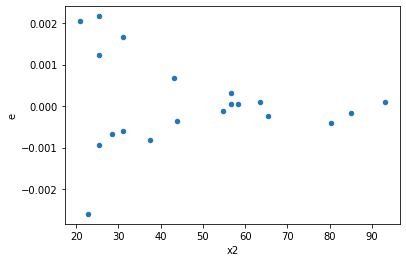

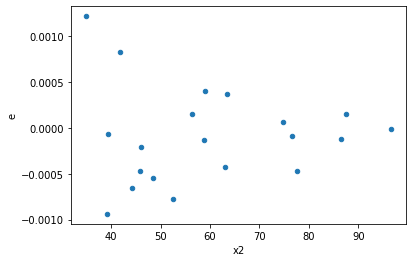

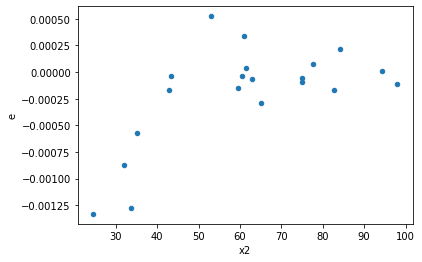

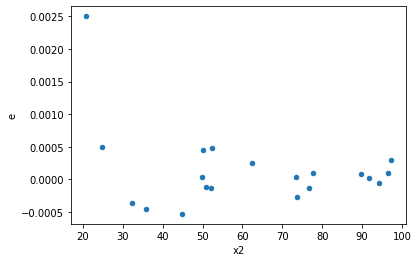

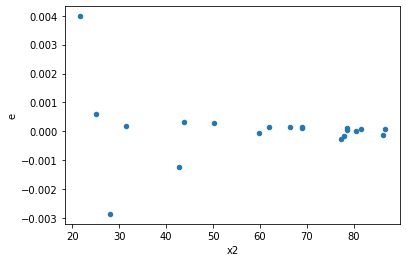

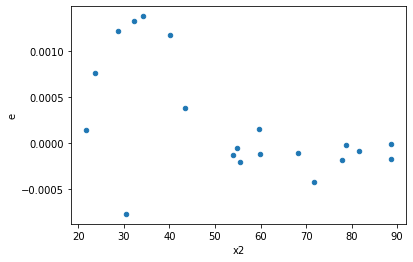

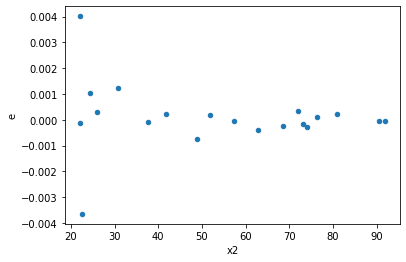

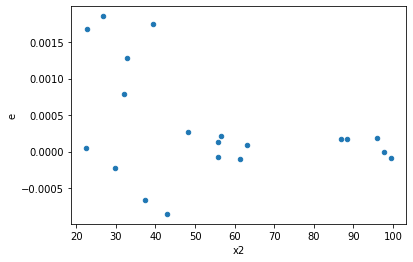

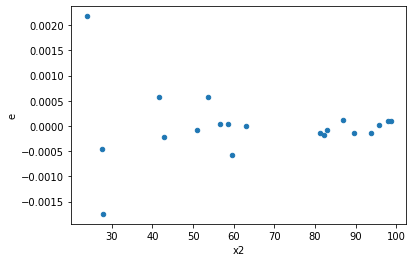

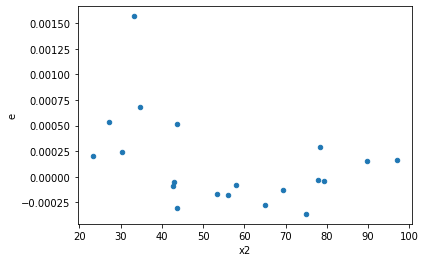

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
8.0,4.0,4.0,1.1326155398149415e-06,1.7421478265900845e-06,2.831538849537354e-07,4.3553695664752113e-07,1.538163450304359,0.6867229753186774,0.6566385123406613,0.3433614876593387,Reject001=1 : Homoscedasticity
11.0,4.0,4.0,2.9821052052986824e-07,1.1207732444269646e-06,7.455263013246706e-08,2.8019331110674115e-07,3.7583289899885,0.22787025488379453,0.8860648725581027,0.11393512744189727,Reject001=1 : Homoscedasticity
17.0,4.0,4.0,1.7063586748676203e-07,2.2683197749910426e-07,4.265896687169051e-08,5.6707994374776066e-08,1.3293335149288115,0.7893351839682026,0.6053324080158987,0.3946675919841013,Reject001=1 : Homoscedasticity
20.0,4.0,4.0,1.3659367013493712e-06,1.4617041014328676e-06,3.414841753373428e-07,3.654260253582169e-07,1.0701111552159703,0.9492169675835682,0.5253915162082159,0.4746084837917841,Reject001=1 : Homoscedasticity
24.0,4.0,4.0,7.154382452201789e-07,3.876988196994235e-06,1.7885956130504473e-07,9.692470492485587e-07,5.419039620674845,0.13049327089245688,0.9347533645537716,0.06524663544622844,Reject001=1 : Homoscedasticity
26.0,4.0,4.0,9.465927576660878e-08,2.9291361386335207e-07,2.3664818941652194e-08,7.322840346583802e-08,3.0943994816266898,0.2996315713694795,0.8501842143152603,0.14981578568473974,Reject001=1 : Homoscedasticity
34.0,4.0,4.0,2.153821846193735e-07,9.182009089017221e-07,5.384554615484337e-08,2.2955022722543053e-07,4.263123760790058,0.18916627571289002,0.905416862143555,0.09458313785644501,Reject001=1 : Homoscedasticity
39.0,4.0,4.0,7.356542033264261e-07,1.2759736098979073e-06,1.8391355083160652e-07,3.189934024744768e-07,1.7344747085360288,0.6067918481748791,0.6966040759125605,0.30339592408743954,Reject001=1 : Homoscedasticity
43.0,4.0,4.0,5.121740276868014e-07,1.4496303683746485e-06,1.2804350692170034e-07,3.624075920936621e-07,2.8303472843435733,0.33777649822426214,0.8311117508878689,0.16888824911213107,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,7.626191512461447e-06,1.4760308198754422e-06,1.9065478781153618e-06,3.6900770496886056e-07,0.19354756793919475,0.14072123096554567,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,1.8139383497566628e-06,3.7995747660737416e-07,4.534845874391657e-07,9.498936915184354e-08,0.20946548522905695,0.15918685828064646,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,6.584543537195407e-07,2.4225611850942315e-08,1.6461358842988516e-07,6.056402962735579e-09,0.03679163439970339,0.007376811720025154,Reject001=0 : Heteroscedasticity
3.0,4.0,4.0,4.173373695288226e-06,2.47381225850444e-07,1.0433434238220566e-06,6.1845306462611e-08,0.059276078279244304,0.01808756472314435,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,4.373525811378598e-06,1.9968943600258263e-08,1.0933814528446494e-06,4.992235900064566e-09,0.004565868468937598,0.00012357290687775767,Reject001=0 : Heteroscedasticity
5.0,4.0,4.0,2.099817399719431e-06,2.06654639109445e-07,5.249543499298578e-07,5.166365977736125e-08,0.09841552848217056,0.045289437028425444,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,5.2815438521143245e-06,2.977106068959773e-07,1.3203859630285811e-06,7.442765172399432e-08,0.05636810281842057,0.01647618473952823,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,2.4239471987440982e-06,1.1953212542306376e-06,6.059867996860246e-07,2.988303135576594e-07,0.49313007100565576,0.5103578509807257,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,1.1326155398149415e-06,1.7421478265900845e-06,2.831538849537354e-07,4.3553695664752113e-07,1.538163450304359,0.6867229753186774,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      762
Reject001=0 : Heteroscedasticity    238
Name: Result_test, dtype: int64